Principal Component Analysis:
                It is a dimensionality reductiojn technique to reduce the dimensions.


In [2]:
import pandas as pd
from sklearn.datasets import load_digits

In [3]:
dataset = load_digits()
dataset.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [5]:
dataset.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [6]:
dataset.data[0].reshape(8, 8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

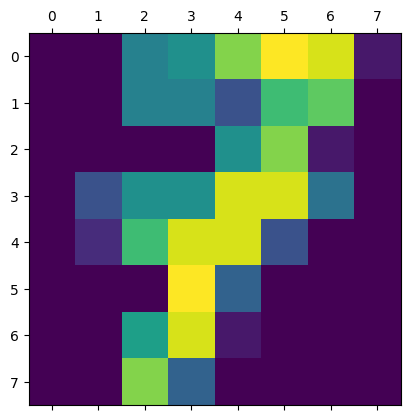

In [12]:
plt.matshow(dataset.data[7].reshape(8,8))

In [15]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [16]:
X = df
y = dataset.target

Scaling the Features

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [20]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9722222222222222

In [24]:
from sklearn.decomposition import PCA
pca = PCA(0.95)

X_pca = pca.fit_transform(X_scaled)
X_pca.shape

(1797, 40)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [27]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9611111111111111

Excercise of PCA with a heart disease dataset from kaggle.

In [29]:
df1 = pd.read_csv('heart.csv')
df1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [33]:
df1.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Pre Prcessing the Dataset

Removing Outliers

In [40]:
df1[df1.Cholesterol > (df1.Cholesterol.mean() + 3*df1.Cholesterol.std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
76,32,M,ASY,118,529,0,Normal,130,N,0.0,Flat,1
149,54,M,ASY,130,603,1,Normal,125,Y,1.0,Flat,1
616,67,F,NAP,115,564,0,LVH,160,N,1.6,Flat,0


In [36]:
df2 = df1[df1.Cholesterol <= df1.Cholesterol.mean() + 3*df1.Cholesterol.std()]

In [38]:
df2.shape

(915, 12)

In [41]:
df1[df1.RestingBP > (df1.RestingBP.mean() + 3*df1.RestingBP.std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
109,39,M,ATA,190,241,0,Normal,106,N,0.0,Up,0
241,54,M,ASY,200,198,0,Normal,142,Y,2.0,Flat,1
365,64,F,ASY,200,0,0,Normal,140,Y,1.0,Flat,1
399,61,M,NAP,200,0,1,ST,70,N,0.0,Flat,1
592,61,M,ASY,190,287,1,LVH,150,Y,2.0,Down,1
732,56,F,ASY,200,288,1,LVH,133,Y,4.0,Down,1
759,54,M,ATA,192,283,0,LVH,195,N,0.0,Up,1


In [45]:
df3 = df2[df2.RestingBP <= df2.RestingBP.mean() + 3*df2.RestingBP.std()]
df3.shape

(908, 12)

In [46]:
df1[df1.FastingBS > (df1.FastingBS.mean() + 3*df1.FastingBS.std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [48]:
df1[df1.MaxHR > (df1.MaxHR.mean() + 3*df1.MaxHR.std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [50]:
df1[df1.Oldpeak > (df1.Oldpeak.mean() + 3*df1.Oldpeak.std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
166,50,M,ASY,140,231,0,ST,140,Y,5.0,Flat,1
702,59,M,TA,178,270,0,LVH,145,N,4.2,Down,0
771,55,M,ASY,140,217,0,Normal,111,Y,5.6,Down,1
791,51,M,ASY,140,298,0,Normal,122,Y,4.2,Flat,1
850,62,F,ASY,160,164,0,LVH,145,N,6.2,Down,1
900,58,M,ASY,114,318,0,ST,140,N,4.4,Down,1


In [51]:
df4 = df3[df3.Oldpeak <= df3.Oldpeak.mean() + 3*df3.Oldpeak.std()]
df4.shape

(902, 12)

In [53]:
df1.ChestPainType.value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [55]:
df1.RestingECG.unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [56]:
df1.ExerciseAngina.unique()

array(['N', 'Y'], dtype=object)

In [57]:
df1.ST_Slope.unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [ ]:
df5 = df4.copy()
df5['RestingECG'] = df5['RestingECG'].map({'Normal': 0, 'ST': 1, 'LVH': 2})
df5['ExerciseAngina'] = df5['ExerciseAngina'].map({'N': 0, 'Y': 1})
df5['ST_Slope'] = df5['ST_Slope'].map({'Up': 0, 'Flat': 1, 'Down': 2})
df5.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,0,172,0,0.0,0,0
1,49,F,NAP,160,180,0,0,156,0,1.0,1,1
2,37,M,ATA,130,283,0,1,98,0,0.0,0,0
3,48,F,ASY,138,214,0,0,108,1,1.5,1,1
4,54,M,NAP,150,195,0,0,122,0,0.0,0,0


In [64]:
df5['Sex'] = df5['Sex'].map({'M': 0, 'F': 1})

In [65]:
df6 = pd.get_dummies(df5, columns=['ChestPainType'], drop_first=True)
df6.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,40,0,140,289,0,0,172,0,0.0,0,0,1,0,0
1,49,1,160,180,0,0,156,0,1.0,1,1,0,1,0
2,37,0,130,283,0,1,98,0,0.0,0,0,1,0,0
3,48,1,138,214,0,0,108,1,1.5,1,1,0,0,0
4,54,0,150,195,0,0,122,0,0.0,0,0,0,1,0


In [66]:
X = df6.drop(columns=['HeartDisease'])
y = df6['HeartDisease']

X.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,40,0,140,289,0,0,172,0,0.0,0,1,0,0
1,49,1,160,180,0,0,156,0,1.0,1,0,1,0
2,37,0,130,283,0,1,98,0,0.0,0,1,0,0
3,48,1,138,214,0,0,108,1,1.5,1,0,0,0
4,54,0,150,195,0,0,122,0,0.0,0,0,1,0


In [67]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.861878453038674

In [70]:
from sklearn.svm import SVC
model = SVC(kernel='linear', random_state=42)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.850828729281768

In [71]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8453038674033149

PCA t reduce dimensions

In [75]:
from sklearn.decomposition import PCA
pca = PCA(5)
X_pca = pca.fit_transform(X_scaled)
X_pca

array([[-2.87105031,  0.28125436, -1.44980299,  0.3827783 , -0.074619  ],
       [-0.76246058,  0.74572385,  1.41584902, -1.23626853, -0.77020088],
       [-1.84111038, -0.05457706, -1.57769145,  0.46895792, -0.56640307],
       ...,
       [ 1.54652939, -0.55218202, -1.04182849, -0.54851409,  0.1150713 ],
       [-1.87902236,  1.72875417, -0.09350489,  0.8711041 , -0.59094517],
       [-2.15069147, -0.86472944,  1.26524533, -1.31400954,  0.24978328]])

In [76]:
X_pca.shape

(902, 5)

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8232044198895028